In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot  as plt
import seaborn as sns

In [15]:
data = pd.DataFrame({
    "Potência": [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    "Eficiência": [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    "Idade": [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    "Tamanho": [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    "Consumo de Energia": ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']
})

In [16]:
x = data[['Potência', 'Eficiência', 'Idade', 'Tamanho']]

y = data[['Consumo de Energia']]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=42)

In [18]:
model = SVC(kernel= 'linear') # crio o modelo SVC
model.fit(x_train,y_train) # treino o modelo

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [19]:
y_pred = model.predict(x_test)

In [20]:
x_test

,Potência,Eficiência,Idade,Tamanho
8,115,88,3,56
1,80,65,8,45
5,130,95,2,62


In [21]:
data.head(18)

,Potência,Eficiência,Idade,Tamanho,Consumo de Energia
0,120,92,3,50,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [22]:
acuracy = accuracy_score(y_pred,y_test)
print(acuracy)

1.0


In [23]:
classi_re = classification_report(y_pred,y_test)
print(classi_re)
# classification_report mostra um resumo das métricas

              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [24]:
cm = confusion_matrix(y_pred,y_test)

Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

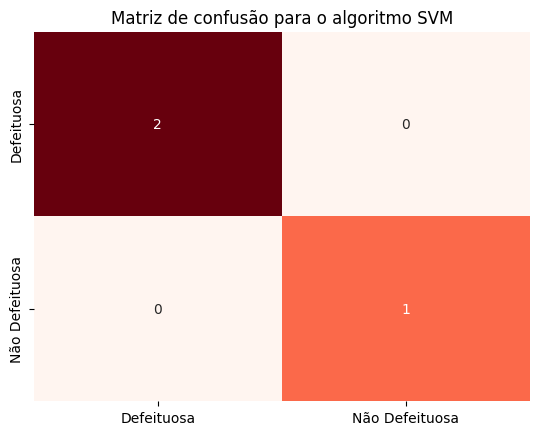

In [25]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Defeituosa', 'Não Defeituosa'], 
            yticklabels=['Defeituosa','Não Defeituosa'])    
                         
plt.title('Matriz de confusão para o algoritmo SVM')  

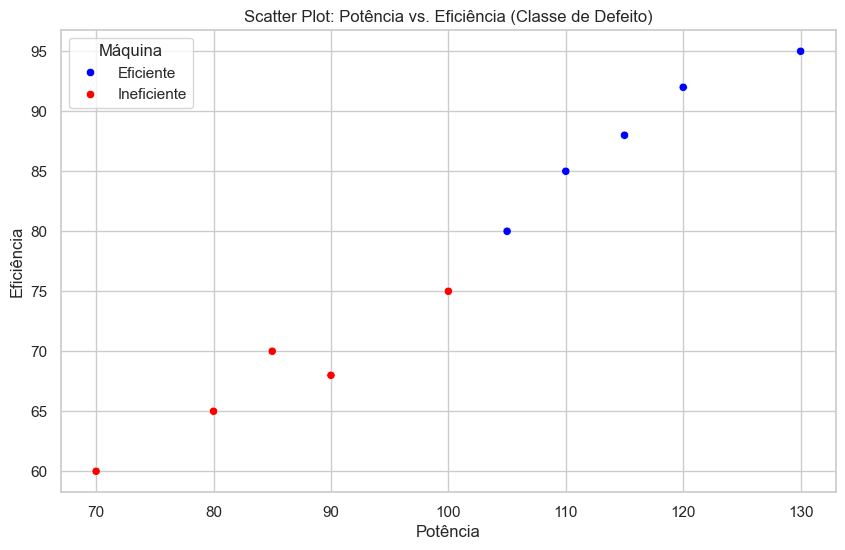

In [30]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Ineficiente": "red", "Eficiente": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potência', y='Eficiência', hue='Consumo de Energia', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potência vs. Eficiência (Classe de Defeito)')
plt.xlabel('Potência')
plt.ylabel('Eficiência')

# Mostrando o gráfico
plt.legend(title='Máquina')
plt.show()